The data set contains hourly power usage of 2storied house located in Houston, Texas, USA. The data set contains hourly power usage in kwh starting from 01-06-2016 to August 2020. The dataset has marked notes for weekdays, weekends, COVID lockdown & vacation days in notes category column. Power usage during day time is different from night time. The electrical devices that are inside the house are security DVR and POI cameras, 2 x refrigerators, 2 x 50gallon water heater that are on during day time. At night several electrical bulbs, TV's, washing machine, dryer and AC run from evening 6pm to morning 8am. Another data contains historical weather report of Houston, Texas starting from 01-06-2016 to August 2020. Thanks to wonderful weather at Houston, Texas we are blessed with almost 9 months of summer. Starting from Feb month to Nov month and winter is only for two months December and January for most of the years.
Objective of this Notebook is to explore features that are critical for forcasting the power usage for a given period. In the process of exploration, we will uncover best possible ways to get to the answer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
#this will give grafical output in same window
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8) #adjests configuration of the plot we will create 


In [2]:
df_usage = pd.read_csv('C:\pythoncode\EDA Python\houston_powerusage\power_usage.csv')
df_weather = pd.read_csv('C:\pythoncode\EDA Python\houston_powerusage\weather_daily.csv')

In [3]:
df_usage.head()

,StartDate,Value(kWh),day_of_week,notes
0,1/6/2016 0:00,1.057,2,weekday
1,1/6/2016 1:00,1.171,2,weekday
2,1/6/2016 2:00,0.560,2,weekday
3,1/6/2016 3:00,0.828,2,weekday
4,1/6/2016 4:00,0.932,2,weekday


In [4]:
df_weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [5]:
# Date column update for 'df_usage'

n = df_usage.shape[0]
p1 = pd.Series(range(n), pd.period_range('2016-06-01 00:00:00', freq = '1H', periods = n))
df_usage['StartDate'] = p1.to_frame().index

# Date column update for 'df_weather'
m = df_weather.shape[0]
p2 = pd.Series(range(m), pd.period_range('2016-06-01', freq = '1D', periods = m))
df_weather['Date'] = p2.to_frame().index

# convert the period date into timestamp
df_usage['StartDate'] = df_usage['StartDate'].apply (lambda x: x.to_timestamp())
df_usage['Date'] = pd.DatetimeIndex(df_usage['StartDate']).date

# convert the period date into timestamp
df_weather['Date'] = df_weather['Date'].apply (lambda x: x.to_timestamp())

In [6]:
df_usage_daily = df_usage.groupby('Date').sum()

df_usage_daily['day_of_week'] = df_usage_daily['day_of_week'].apply(lambda x: x/24)

notes_col = df_usage.groupby('Date').first()['notes'].values
df_usage_daily['notes'] = notes_col
df_usage_daily.head()

,Value(kWh),day_of_week,notes
Date,,,
2016-06-01,29.691,2.0,weekday
2016-06-02,28.789,5.0,weekend
2016-06-03,19.247,6.0,weekend
2016-06-04,22.883,2.0,weekday
2016-06-05,25.195,4.0,weekday


In [7]:
#filter the weather data to match with power usage dataframe. 

k = df_usage_daily.shape[0]
df_weather = df_weather[0:k]
df_weather.set_index('Date', inplace=True)
df_weather.head()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-06-01,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-06-02,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-06-03,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-06-04,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-06-05,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [8]:
df_weather.shape

(1498, 18)

In [9]:
comb_df = pd.merge(df_weather,df_usage_daily,left_index=True, right_index=True)

In [10]:
comb_df.columns


Index(['Day', 'Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg',
       'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg',
       'Wind_min', 'Press_max', 'Press_avg', 'Press_min', 'Precipit',
       'day_of_week_x', 'Value(kWh)', 'day_of_week_y', 'notes'],
      dtype='object')

In [11]:
comb_df.drop(columns= ['Temp_avg', 'Temp_min','Dew_avg',
       'Dew_min', 'Hum_avg', 'Hum_min', 'Wind_avg',
       'Wind_min','Press_avg', 'Press_min', 'Precipit','day_of_week_x', 'day_of_week_y'], inplace=True)
comb_df.index.freq= 'D'

In [12]:
comb_df.head()

,Day,Temp_max,Dew_max,Hum_max,Wind_max,Press_max,Value(kWh),notes
Date,,,,,,,,
2016-06-01,1,85,74,100,21,29.8,29.691,weekday
2016-06-02,2,76,74,100,18,29.8,28.789,weekend
2016-06-03,3,79,72,100,18,29.8,19.247,weekend
2016-06-04,4,76,73,100,20,29.8,22.883,weekday
2016-06-05,5,82,72,100,17,29.7,25.195,weekday


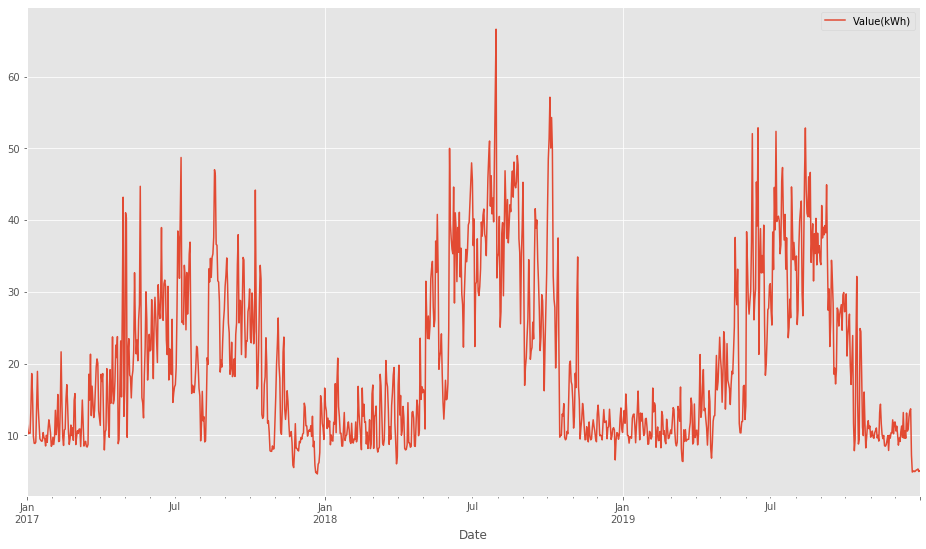

In [13]:
comb_df['Value(kWh)'].loc['2017-01-01':'2019-12-31'].plot(figsize= (16,9), legend= True)

Three year power usage vs time. Peak value of power usage in 2017 year is around 50kWh, and during 2018 was about 68kWh, followed by 2019 was 55kWh.

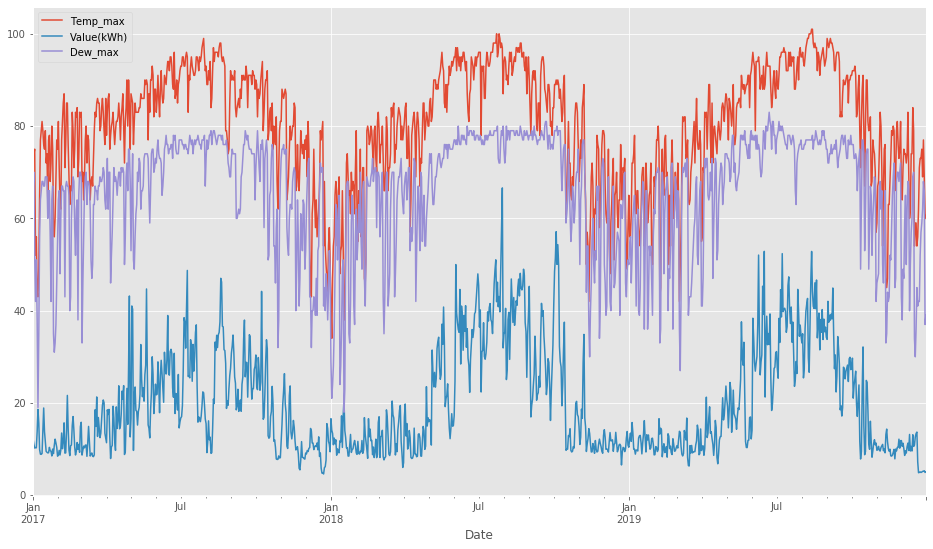

In [14]:
comb_df[['Temp_max','Value(kWh)', 'Dew_max' ]].loc['2017-01-01':'2019-12-31'].plot(figsize= (16,9))

From the above graph, power usage has direct relation to Temperature & Dew. The data has fluctations hence needs smoothing and filters.

In [24]:
comb_df.head()

,Day,Temp_max,Dew_max,Hum_max,Wind_max,Press_max,Value(kWh),notes
Date,,,,,,,,
2016-06-01,1,85,74,100,21,29.8,29.691,weekday
2016-06-02,2,76,74,100,18,29.8,28.789,weekend
2016-06-03,3,79,72,100,18,29.8,19.247,weekend
2016-06-04,4,76,73,100,20,29.8,22.883,weekday
2016-06-05,5,82,72,100,17,29.7,25.195,weekday


In [15]:
df_short = comb_df.loc['2017-01-01':'2019-12-31']

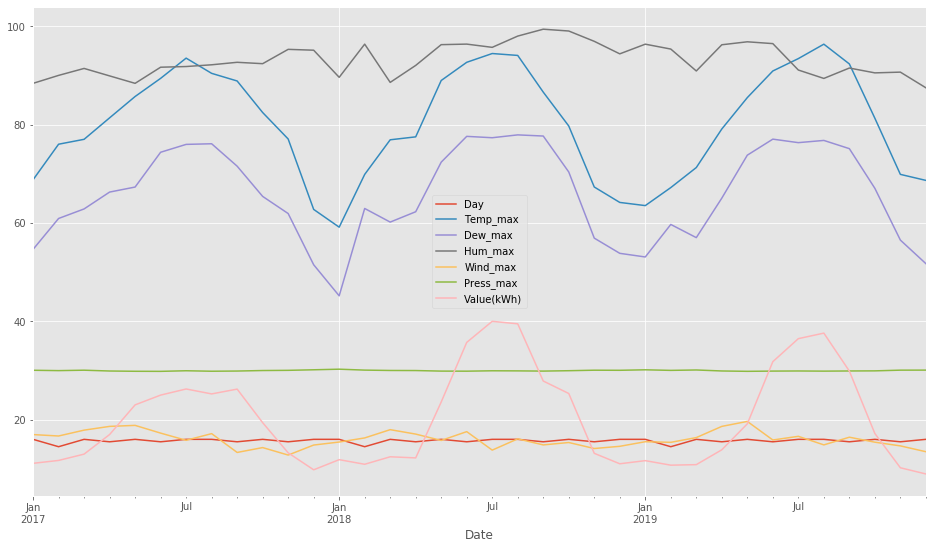

In [16]:
df_short.resample(rule= 'M').mean().plot(figsize= (16,9))

The monthly data for 3 years show minimal fluctations. Again only two curves (Temp and Dew) show co relation to power, hence rest of the data columns are removed from the analysis.

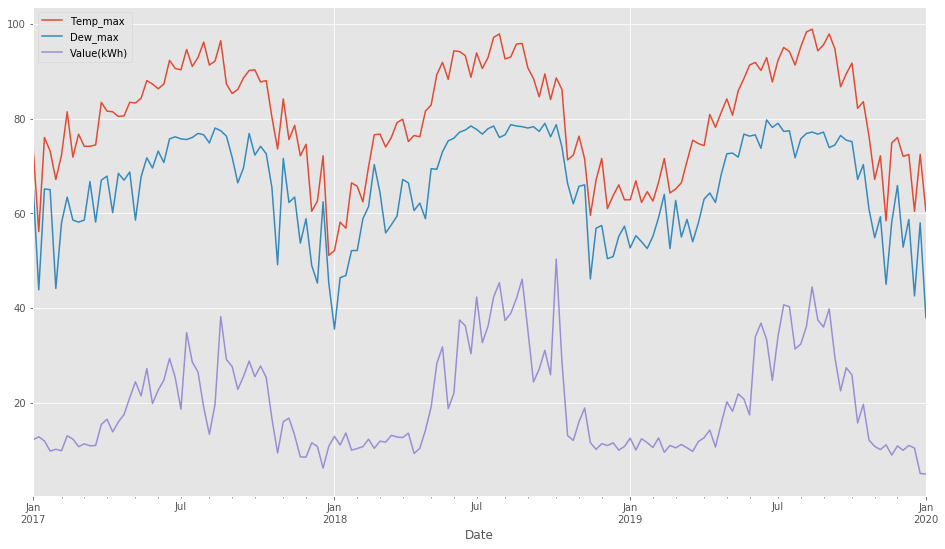

In [17]:
df_short = df_short[['Temp_max', 'Dew_max', 'Value(kWh)','notes']]

df_short.resample(rule= 'W').mean().plot(figsize= (16,9))

The graph shows significant fluctations. Hence filters to be applied.

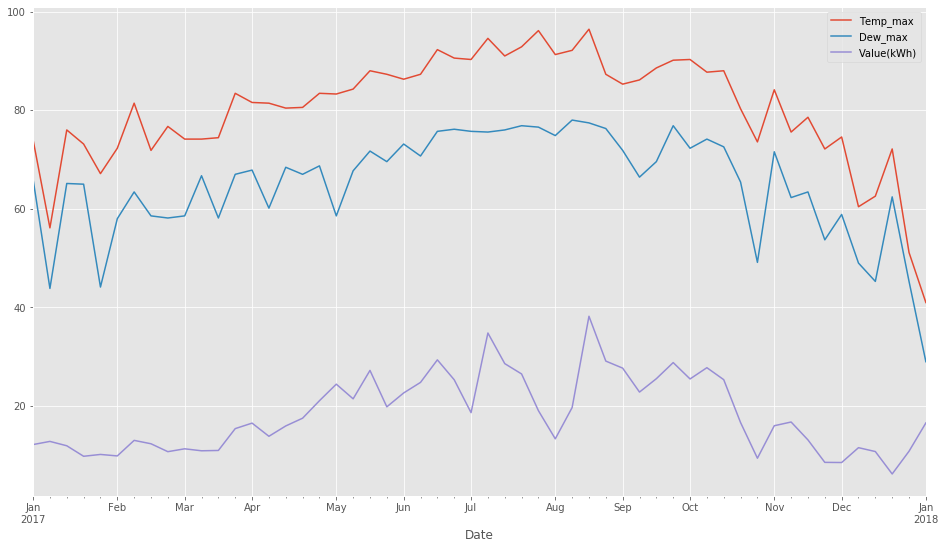

In [18]:
df_short.loc['2017-01-01': '2018-01-01'].resample(rule= 'W').mean().plot(figsize= (16,9), legend=True)

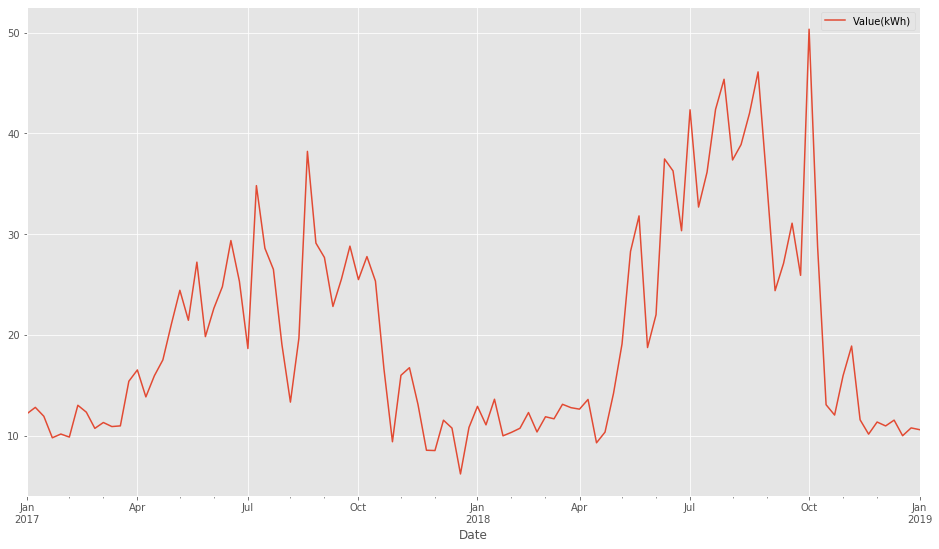

In [21]:
df_short['Value(kWh)'].loc['2017-01-01': '2019-01-01'].resample(rule= 'W').mean().plot(figsize= (16,9), legend=True)

Clearly the data shows seasonality, during summar month between may to oct the power usage is higher.During months of Jan, Feb, march, April, Nov and Dec the AC is not running for most of the time, occationally Heater is on. Hence you see lower power bill during these months.

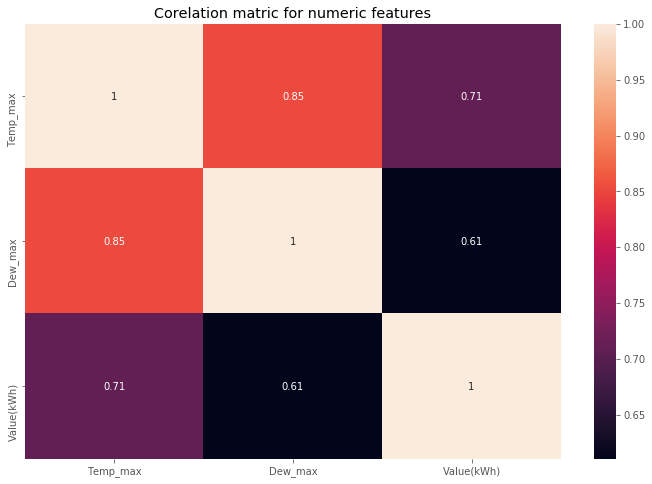

In [23]:
#Relationship Test
corelation_metrix = df_short.corr() # bydefault(method ='pearson')
sns.heatmap(corelation_metrix, annot=True)
plt.title('Corelation matric for numeric features')

plt.show()